## Example of how to download a raster area using the CopernicusDownloader class

#### Download Raster Area giving an address

BoundingBox(7.550794238386118, 44.93585061486487, 7.821064508656388, 45.20612088513514)
Authenticated using refresh token.


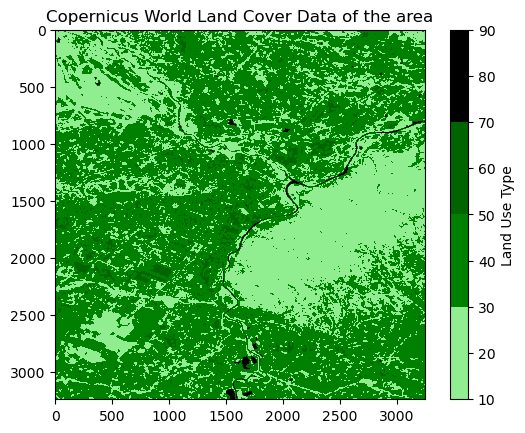

In [2]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
from data.downloader.OSMDownloader import OSMDownloader

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
        use_oidc=False
    )
# use_oidc=False indicates we are using the client_id and client_secret for authentication
# with use_oidc=True, we would use the OpenID Connect authentication method

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query="Piazza Castello, Torino", method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

copernicus_area = copernicus_downloader.get_data(bounding_box)

raster_data = copernicus_area["data"]

# Plot the raster data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Cover Data of the area')

plt.show()

#### Download Raster Area giving the bounding box Geojson data

BoundingBox(12.4, 41.8, 12.6, 42.0)
Authenticated using refresh token.


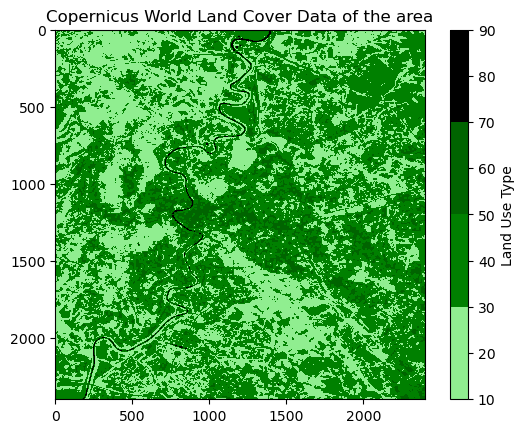

In [3]:
import json
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader


copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
        use_oidc=False
    )
# use_oidc=False indicates we are using the client_id and client_secret for authentication
# with use_oidc=True, we would use the OpenID Connect authentication method

# Define the bounding box coordinates with bbox property
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [12.4, 41.8],
                        [12.6, 41.8],
                        [12.6, 42.0],
                        [12.4, 42.0],
                        [12.4, 41.8]
                    ]
                ]
            },
            "properties": {}
        }
    ]
}

# Save the GeoJSON data to a file
with open('bounding_box.geojson', 'w') as f:
    json.dump(geojson_data, f, indent=4)

# Load the GeoJSON data from the file
with open('bounding_box.geojson', 'r') as f:
    geojson_content = json.load(f)

# Create a BoundingBox instance and use the from_geojson method
bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=None, method='from_geojson', geojson=geojson_content)

print(bounding_box)
# we are using the "from_geojson" method to get the bounding box coordinates, it gets the bounding box from a GeoJSON data
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"

copernicus_area = copernicus_downloader.get_data(bounding_box)

raster_data = copernicus_area["data"]

# Plot the raster data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Cover Data of the area')

plt.show()

#### Download Raster Area giving the bounding box coordinates

BoundingBox(12.4, 41.8, 12.6, 42.0)
Authenticated using refresh token.


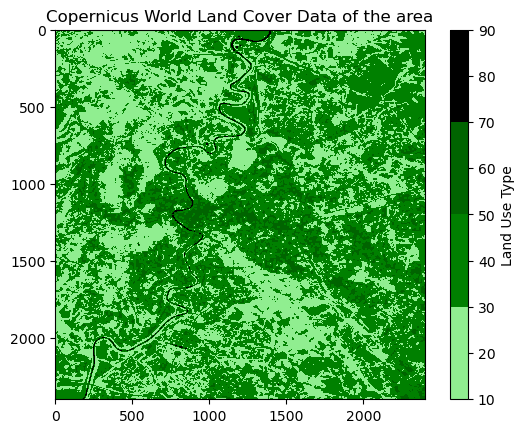

In [4]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
        use_oidc=False
    )
# use_oidc=False indicates we are using the client_id and client_secret for authentication
# with use_oidc=True, we would use the OpenID Connect authentication method

# Create a BoundingBox instance and use the from_coordinates method
bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=None, method='from_coordinates', min_x=12.4, min_y=41.8, max_x=12.6, max_y=42.0)
# we are using the "from_coordinates" method to get the bounding box coordinates, it gets the bounding box from the minimum and maximum coordinates

print(bounding_box)

copernicus_area = copernicus_downloader.get_data(bounding_box)

raster_data = copernicus_area["data"]

# Plot the raster data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Cover Data of the area')

plt.show()

Authenticated using refresh token.


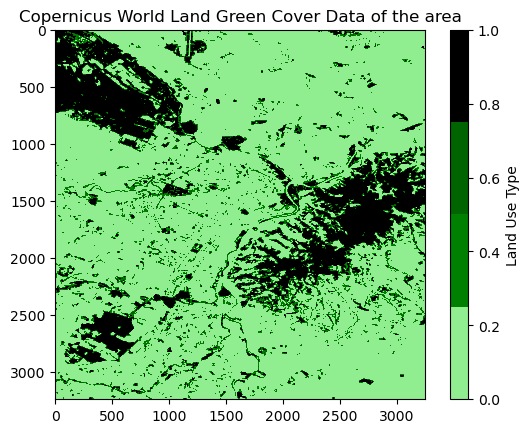

In [3]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
from data.utils.LandUtilsCopernicus import LandUtilsCopernicus
from data.utils.LandUtilsOSM import LandUtilsOSM
from data.downloader.OSMDownloader import OSMDownloader
from data.utils.LandUtils import LandUtils

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
        use_oidc=False
)
osm_downloader = OSMDownloader()
bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query="Piazza Castello, Torino", method="from_center_radius", radius_km=15)
utils = LandUtils()

copernicus_area = copernicus_downloader.get_data(bounding_box)
osm_area = osm_downloader.get_data(bounding_box)
osm_utils = LandUtilsOSM(osm_area, bounding_box)
osm_green = osm_utils.get_green_area()
osm_green_raster = utils.vector_to_raster(osm_green, copernicus_area)

copernicus_utils = LandUtilsCopernicus(copernicus_area,osm_green_raster)
copernicus_green = copernicus_utils.get_green_area()

raster_data = copernicus_green["data"]

# Plot the raster data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Green Cover Data of the area')

plt.show()